In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((0.219,0.224,0.232,0.238,0.205,0.258,0.206,0.212,0.317,0.285,0.237,0.267,0.201,0.246,0.299,0.293,0.279,0.293,0.209,0.212,0.306,0.300,0.298,0.269,
                 0.210,0.234,0.235,0.277,0.297,0.215,0.118,0.142,0.227,0.192,0.174,0.147,0.129,0.138,0.186,0.198,0.165,0.185,0.133,0.148,0.196,0.199,0.191,0.163,0.153,
                 0.164,0.206,0.191,0.227,0.200,0.16,0.146,0.181,0.205,0.195,0.146))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,0.219
1,0.224
2,0.232
3,0.238
4,0.205


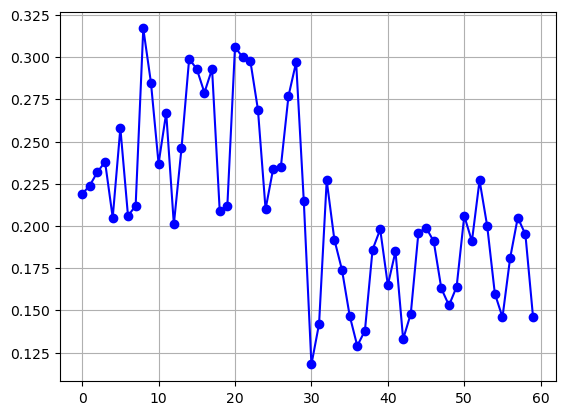

In [2]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


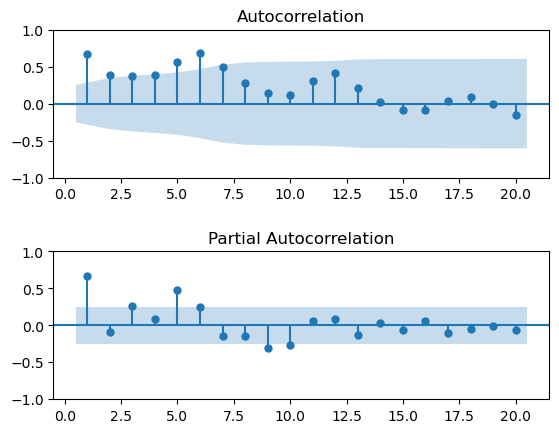

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


In [4]:
df['lag2'] = df['Xbar'].shift(2)
df['year']=np.repeat(np.arange(2011, 2016), 12)
df['month']=np.tile(np.array([1,2,3,4,5,6,7,8,9,10,11,12]), int(len(df)/12))
df['dummy']=np.zeros(60)
df['dummy'][30:]=1
X = df.iloc[2:, 1:]
y = df.iloc[2:, 0]

c:\Users\Salam\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const  0.254643 6.140220e-43
dummy -0.081143 8.886282e-13

MODEL SUMMARY
-------------
     S     R-sq  R-sq(adj)
0.0336 0.601329    0.59421

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const  0.331289 9.836876e-16
dummy -0.103324 6.644214e-12
 lag2 -0.303935 1.092893e-02

MODEL SUMMARY
-------------
       S     R-sq  R-sq(adj)
0.031948 0.645995   0.633122
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

COEFFICIENTS
------------
 Term      Coef      P-Value
const  0.326336 4.260903e-16
dummy -0.110103 5.191255e-13
 lag2 -0.359699 2.303539e-03
month  0.003060 1.514262e-02

MODEL SUMMARY
-------------
       S     R-sq  R-

In [6]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Xbar =  -24.054 const -0.141 dummy -0.387 lag2 + 0.004 month + 0.012 year

COEFFICIENTS
------------
 Term     Coef  SE Coef  T-Value    P-Value
const -24.0540  11.2416  -2.1397 3.6999e-02
dummy  -0.1414   0.0183  -7.7199 3.1403e-10
 lag2  -0.3869   0.1095  -3.5344 8.5714e-04
month   0.0041   0.0013   3.2059 2.2826e-03
 year   0.0121   0.0056   2.1688 3.4608e-02

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0295 0.7088     0.6868

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  4.0  0.1124  0.0281  32.2509 1.2517e-13
     const  1.0  0.0040  0.0040   4.5784 3.6999e-02
     dummy  1.0  0.0519  0.0519  59.5972 3.1403e-10
      lag2  1.0  0.0109  0.0109  12.4919 8.5714e-04
     month  1.0  0.0090  0.0090  10.2780 2.2826e-03
      year  1.0  0.0041  0.0041   4.7035 3.4608e-02
     Error 53.0  0.0462  0.0009      NaN        NaN
     Total 57.0  0.1586     NaN      NaN        NaN


Shapiro-Wilk test p-value = 0.567


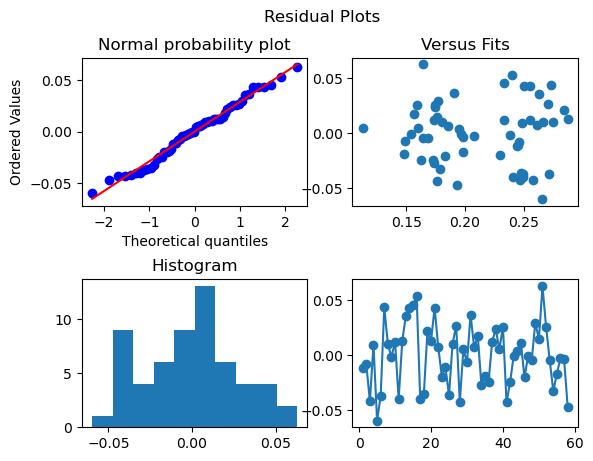

In [7]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.064


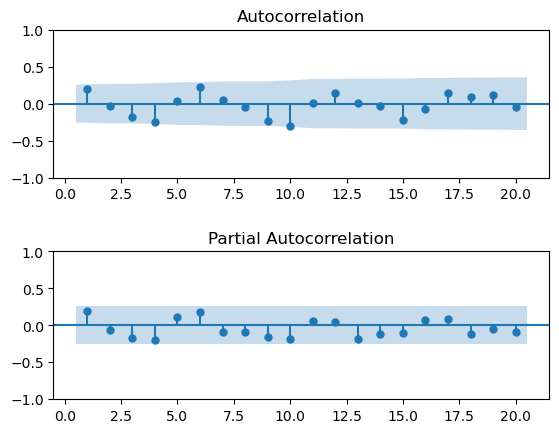

In [8]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(df)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

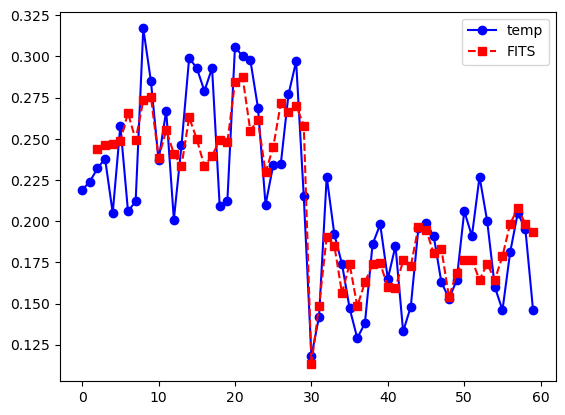

In [9]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

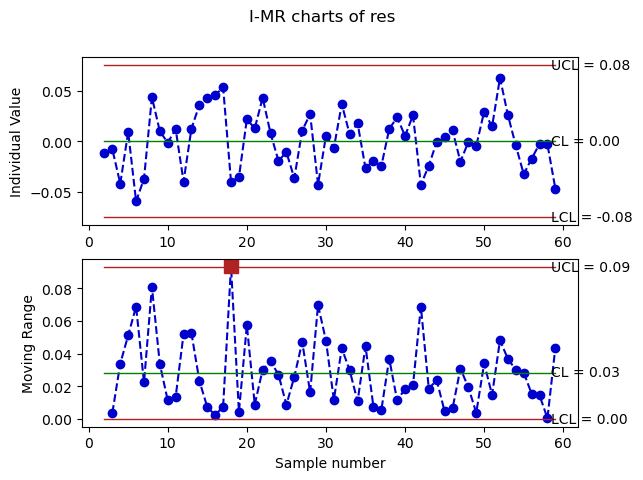

In [10]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

>## ANOTHER MODEL

In [11]:
# Import the dataset
data_stack = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
data_stack.head()

data_stack['month1']=np.tile(np.array([1,0,0,0,0,0,0,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month2']=np.tile(np.array([0,1,0,0,0,0,0,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month3']=np.tile(np.array([0,0,1,0,0,0,0,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month4']=np.tile(np.array([0,0,0,1,0,0,0,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month5']=np.tile(np.array([0,0,0,0,1,0,0,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month6']=np.tile(np.array([0,0,0,0,0,1,0,0,0,0,0,0]), int(len(data_stack)/12))

data_stack['month7']=np.tile(np.array([0,0,0,0,0,0,1,0,0,0,0,0]), int(len(data_stack)/12))
data_stack['month8']=np.tile(np.array([0,0,0,0,0,0,0,1,0,0,0,0]), int(len(data_stack)/12))
data_stack['month9']=np.tile(np.array([0,0,0,0,0,0,0,0,1,0,0,0]), int(len(data_stack)/12))
data_stack['month10']=np.tile(np.array([0,0,0,0,0,0,0,0,0,1,0,0]), int(len(data_stack)/12))
data_stack['month11']=np.tile(np.array([0,0,0,0,0,0,0,0,0,0,1,0]), int(len(data_stack)/12))
data_stack['month12']=np.tile(np.array([0,0,0,0,0,0,0,0,0,0,0,1]), int(len(data_stack)/12))

In [12]:
data_stack['lag1'] = data_stack['Xbar'].shift(1)
data_stack['dummy']=np.zeros(60)
data_stack['dummy'][30:]=1
X2 = data_stack.iloc[1:, 1:]
y2 = data_stack.iloc[1:, 0]

c:\Users\Salam\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model2 = stepwise.fit(y2, X2)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term    Coef    P-Value
const  0.2536 7.9031e-44
dummy -0.0801 8.1949e-13

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0335 0.5959     0.5888

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
  Term    Coef    P-Value
 const  0.2566 8.8181e-45
 dummy -0.0787 1.8837e-13
month7 -0.0442 3.9448e-03

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0314 0.6521     0.6397
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection

COEFFICIENTS
------------
  Term    Coef    P-Value
 const  0.2602 9.2069e-46
 dummy -0.0787 1.6511e-14
month7 -0.0477 9.8416e-04
month1 -0.0476 2.7502e-03

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0292 0.7049     0.6888
-------------------
Ba

In [14]:
results2 = model2.model_fit
qda.summary(results2)

REGRESSION EQUATION
-------------------
Xbar =  + 0.206 const -0.060 dummy -0.058 month7 -0.052 month1 -0.036 month8 -0.023 month2 + 0.035 month9 -0.022 month12 + 0.232 lag1

COEFFICIENTS
------------
   Term    Coef  SE Coef  T-Value    P-Value
  const  0.2062   0.0332   6.2030 1.0574e-07
  dummy -0.0604   0.0111  -5.4380 1.6117e-06
 month7 -0.0583   0.0108  -5.4101 1.7785e-06
 month1 -0.0519   0.0120  -4.3383 6.9670e-05
 month8 -0.0364   0.0127  -2.8567 6.2203e-03
 month2 -0.0233   0.0126  -1.8468 7.0705e-02
 month9  0.0354   0.0123   2.8788 5.8601e-03
month12 -0.0225   0.0107  -2.0982 4.0960e-02
   lag1  0.2324   0.1230   1.8890 6.4705e-02

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0221 0.8457      0.821

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  8.0  0.1342  0.0168  34.2538 1.0370e-17
     const  1.0  0.0188  0.0188  38.4775 1.0574e-07
     dummy  1.0  0.0145  0.0145  29.5722 1.6117e-06
    month7  1.0  0

Shapiro-Wilk test p-value = 0.078


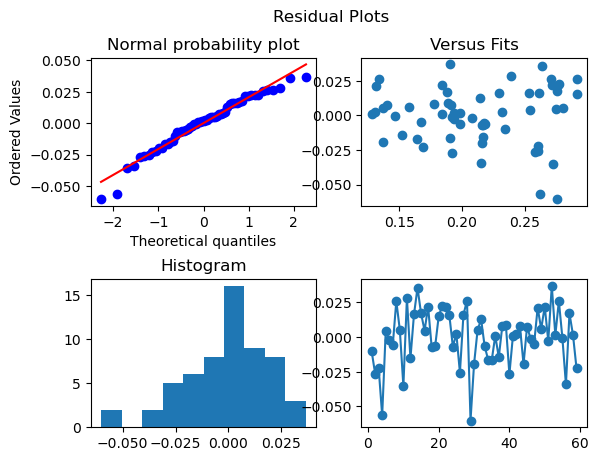

In [15]:
#Check on residuals
residuals2 = results2.resid
fits2 = results2.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW2 = stats.shapiro(residuals2)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW2)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals2, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits2, residuals2)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals2)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals2)+1), residuals2, 'o-')
plt.show()

Runs test p-value on the residuals = 0.807


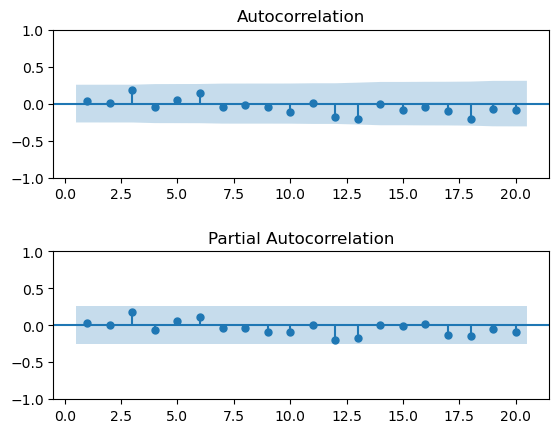

In [16]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res2 = runstest_1samp(residuals2, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res2))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals2, lags = int(len(data_stack)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals2, lags = int(len(data_stack)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

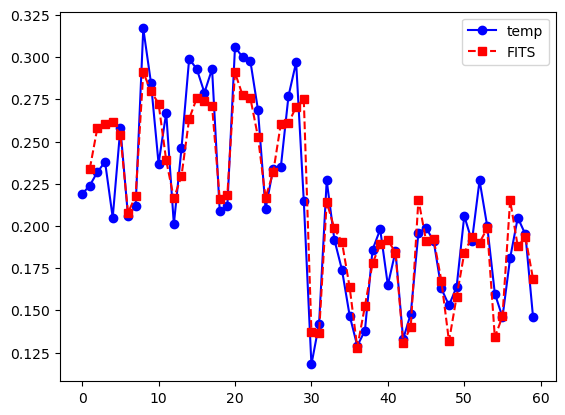

In [17]:
plt.plot(data_stack['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results2.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

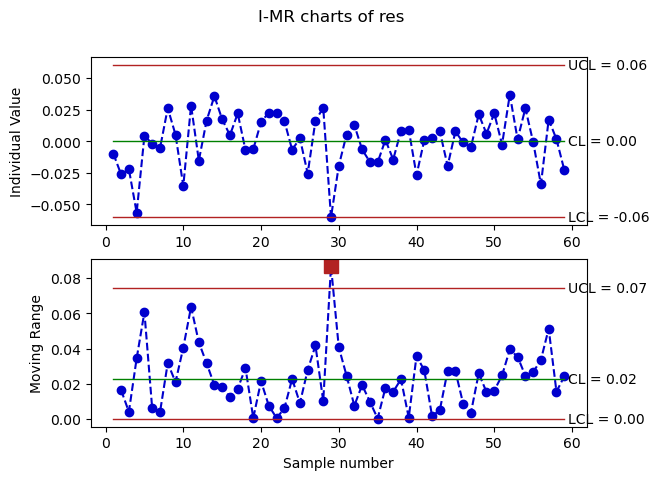

In [18]:
# Put the residuals in a dataframe
df_SCC2 = pd.DataFrame(results2.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR2 = qda.ControlCharts.IMR(df_SCC2, 'res')